### ROC 곡선 그리기

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
%matplotlib inline

In [3]:
sens_F = np.array([1.0,  1.0, 1.0,  1.0, 0.75,  0.5,  0.5, 0.5, 0.5, 0.5, 0.0])
spec_F = np.array([0.0, 0.16, 0.5, 0.66, 0.66, 0.66, 0.83, 1.0, 1.0, 1.0, 1.0])

sens_G = np.array([1.0,  1.0, 0.75, 0.75, 0.5,  0.5,  0.5,  0.5, 0.25, 0.25, 0.0])
spec_G = np.array([0.0, 0.33, 0.33,  0.5, 0.5, 0.66, 0.66, 0.83, 0.83,  1.0, 1.0])

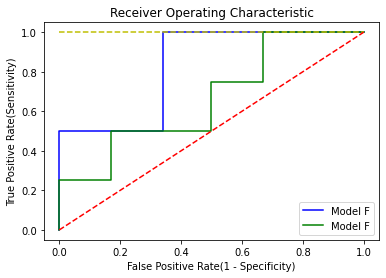

In [6]:
plt.title('Receiver Operating Characteristic')
plt.xlabel('False Positive Rate(1 - Specificity)')
plt.ylabel('True Positive Rate(Sensitivity)')

plt.plot(1-spec_F, sens_F, 'b', label = 'Model F')
plt.plot(1-spec_G, sens_G, 'g', label = 'Model F')
plt.plot([0,1],[1,1],'y--')
plt.plot([0,1],[0,1],'r--')

plt.legend(loc='lower right')
plt.show()

### 함수들
#### roc_curve() 함수
: 자동적으로 생성되는 임계값에 따라 FP rate, TP rate, thresholds를 flxjs

#### auc() 함수
: FP rate, TP rate를 input으로 받아 auc를 계산해주는 함수

In [7]:
from sklearn.metrics import roc_curve, auc

In [8]:
# 실제 클래스와 1로 판정될 확률
class_F = np.array([0, 0, 0, 0, 1, 1, 0, 0, 1, 1])
proba_F = np.array([0.05, 0.15, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.95, 0.95])

class_G = np.array([0, 0, 1, 0, 1, 0, 0, 1, 0, 1])
proba_G = np.array([0.05, 0.05, 0.15, 0.25, 0.35, 0.45, 0.65, 0.75, 0.85, 0.95])

In [24]:
false_positivie_rate_F, ture_positive_rate_F, thresholds_F = roc_curve(class_F, proba_F)
false_positivie_rate_G, ture_positive_rate_G, thresholds_G = roc_curve(class_G, proba_G)
roc_auc_F = auc(false_positivie_rate_F, ture_positive_rate_F)
roc_auc_G = auc(false_positivie_rate_G, ture_positive_rate_G)

In [12]:
thresholds_F

array([1.95, 0.95, 0.55, 0.35, 0.25, 0.15, 0.05])

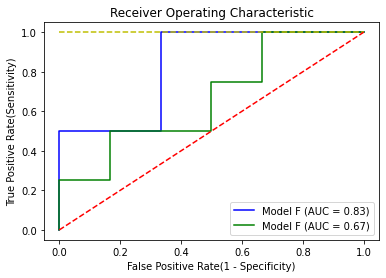

In [25]:
plt.title('Receiver Operating Characteristic')
plt.xlabel('False Positive Rate(1 - Specificity)')
plt.ylabel('True Positive Rate(Sensitivity)')

plt.plot(false_positivie_rate_F, ture_positive_rate_F, 'b', label = 'Model F (AUC = %0.2f)'% roc_auc_F)
plt.plot(false_positivie_rate_G, ture_positive_rate_G, 'g', label = 'Model F (AUC = %0.2f)'% roc_auc_G)
plt.plot([0,1],[1,1],'y--')
plt.plot([0,1],[0,1],'r--')

plt.legend(loc='lower right')
plt.show()

### Precision - Recall graph

In [26]:
precision_F = np.array([0.33, 0.38, 0.45, 0.55, 0.57, 0.40, 0.66, 1.0, 1.0, 1.0, 1.0])
recall_F = np.array([1.0, 1.0, 1.0, 1.0, 0.8, 0.4, 0.4, 0.4, 0.4, 0.2, 0.0])

precision_G = np.array([0.33, 0.38, 0.36, 0.37, 0.33, 0.40, 0.33, 0.5, 1.0, 1.0, 1.0])
recall_G = np.array([1.0, 1.0, 0.8, 0.6, 0.4, 0.4, 0.2, 0.2, 0.2, 0.2, 0.0])

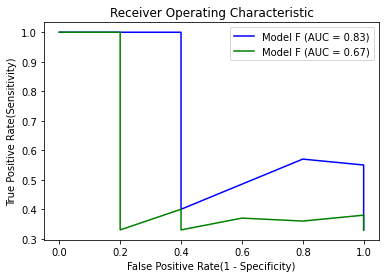

In [27]:
plt.title('Receiver Operating Characteristic')
plt.xlabel('False Positive Rate(1 - Specificity)')
plt.ylabel('True Positive Rate(Sensitivity)')

plt.plot(recall_F, precision_F, 'b', label = 'Model F (AUC = %0.2f)'% roc_auc_F)
plt.plot(recall_G, precision_G, 'g', label = 'Model F (AUC = %0.2f)'% roc_auc_G)

plt.legend(loc='upper right')
plt.show()

### 함수 이용하기
#### precision_recall_curve() 함수
#### average_precision_score() 함수
: AP(Average Precision) = 각 재현율에 해당하는 정밀도의 평균

In [28]:
from sklearn.metrics import precision_recall_curve, average_precision_score

In [29]:
class_F = np.array([0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1])
proba_F = np.array([0.05, 0.05, 0.15, 0.15, 0.25, 0.25, 0.35, 0.35, 0.45, 0.45, 0.55, 0.55, 0.65, 0.85, 0.95])

class_G = np.array([0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1])
proba_G = np.array([0.05, 0.05, 0.15, 0.15, 0.25, 0.25, 0.25, 0.35, 0.35, 0.45, 0.55, 0.55, 0.65, 0.75, 0.95])